Exntension of this grayscaled img: JPEG
Shape of this grayscaled img: (6000, 4000)
Color mode of this grayscaled img: RGB
Shape of this negative grayscaled img: (6000, 4000)
Shape of this gamma increased grayscaled img: (4000, 6000, 3)
Shape of this gamma decreased grayscaled img: (4000, 6000, 3)
C value is: 45.98590442833571
Image max pixel value is: 255


<ipython-input-8-7f91d39493d6>:52: RuntimeWarning: divide by zero encountered in log
  log_transformed_img = c * np.log(1 + np_image)


Shape of this log transformed grayscaled img: (4000, 6000, 3)
Shape of this reverse log transformed grayscaled img: (4000, 6000, 3)


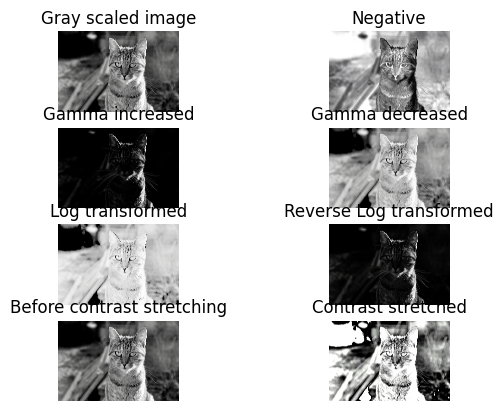

In [8]:
from PIL import Image
import PIL.ImageOps
import numpy as np
import matplotlib.pyplot as plt

# def rgb2gray(rgb_img):
#   return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

#First read an image
#img = cv2.imread("/content/pexels-pixabay-45201.jpg",-1)

#img3 = cv2.imread("/content/pexels-pixabay-45201.jpg",0)

# origin_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print("Shape of this RGB image:", origin_img.shape)
# gray_img2= rgb2gray(origin_img)
# gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print("Shape of this grayscaled img:", gray_img.shape)
# root_img = np.power(img3,1/3)
# print("Shape of this rooted grayscaled img:", root_img.shape)
# powered_img = np.power(img3,3)
# print("Shape of this powered grayscaled img:", powered_img.shape)

#negative_colored = cv2.bitwise_not(origin_img) #abs(255-origin_img)


nth_power = 6.2
nth_root = 0.47
img = Image.open("/content/seeds.jpg")
img2 = Image.open("/content/pexels-jan-ernest-9811888.jpg")
print("Exntension of this grayscaled img:", img2.format)
print("Shape of this grayscaled img:", img2.size)
print("Color mode of this grayscaled img:", img2.mode)


np_image = np.asarray(img2)
negative_gray = PIL.ImageOps.invert(img2) #abs(255-img2)
print("Shape of this negative grayscaled img:", negative_gray.size)

nth_power_image = np.array(255* (np_image/255) ** nth_power, dtype = np.uint8)
print("Shape of this gamma increased grayscaled img:", nth_power_image.shape)

nth_root_image = np.array(255* (np_image/255) ** nth_root, dtype = np.uint8)
print("Shape of this gamma decreased grayscaled img:", nth_root_image.shape)

max_pixel = np.max(np_image)
c= 255/(np.log(1+ max_pixel))
#c = 35
print("C value is:", c)
print("Image max pixel value is:", max_pixel)

log_transformed_img = c * np.log(1 + np_image)
log_transformed_img = np.array(log_transformed_img, dtype = np.uint8)
print("Shape of this log transformed grayscaled img:", log_transformed_img.shape)

reverse_log_img = np.exp(np_image ** 1/c) -1
reverse_log_img = np.array(reverse_log_img, dtype = np.uint8)
print("Shape of this reverse log transformed grayscaled img:", reverse_log_img.shape)

def PixelValMatch(img, r1, s1, r2, s2):
  if(0 < img and img <= r1):
     return (s1 / r1) * img
  elif (r1 < img and img <= r2):
     return ((s1-s2) /(r1-r2)) *img + (( (s2*r1) - (s1*r2) ) / (r1-r2))
  else:
     return ((s2 - 255) / (r2 - 255)) + (( (255*r2) - (s2*255) ) / (r2-255))

r1 = 40
s1 = 0
r2 = 140
s2= 255
np_image2 = np.asarray(img2)

#img_vector = np.vectorize(np_image2)

PixelValMatch_vec = np.vectorize(PixelValMatch)
contrast_stretched = PixelValMatch_vec(img2, r1, s1, r2 , s2)
contrast_stretched = np.array(contrast_stretched, dtype = np.uint8)

fig, axs = plt.subplots(4,2)
axs[0,0].imshow(img2)
axs[0,0].set_title('Gray scaled image')
axs[0,0].axis('off')

axs[0,1].imshow(negative_gray)
axs[0,1].set_title('Negative')
axs[0,1].axis('off')

axs[1,0].imshow(nth_power_image)
axs[1,0].set_title('Gamma increased')
axs[1,0].axis('off')

axs[1,1].imshow(nth_root_image)
axs[1,1].set_title('Gamma decreased')
axs[1,1].axis('off')

axs[2,0].imshow(log_transformed_img)
axs[2,0].set_title('Log transformed')
axs[2,0].axis('off')

axs[2,1].imshow(reverse_log_img)
axs[2,1].set_title('Reverse Log transformed')
axs[2,1].axis('off')

axs[3,0].imshow(img2)
axs[3,0].set_title('Before contrast stretching')
axs[3,0].axis('off')

axs[3,1].imshow(contrast_stretched)
axs[3,1].set_title('Contrast stretched')
axs[3,1].axis('off')
plt.show()

# Histogram plotting of the image
# color = ('b', 'g', 'r')

# for i, col in enumerate(color):

#     histr = cv2.calcHist([img],
#                          [i], None,
#                          [256],
#                          [0, 256])

#     plt.plot(histr, color = col)

#     # Limit X - axis to 256
#     plt.xlim([0, 256])

# plt.show()

# # get height and width of the image
# height, width, _ = img.shape

# for i in range(0, height - 1):
#     for j in range(0, width - 1):

#         # Get the pixel value
#         pixel = img[i, j]

#         # Negate each channel by
#         # subtracting it from 255

#         # 1st index contains red pixel
#         pixel[0] = 255 - pixel[0]

#         # 2nd index contains green pixel
#         pixel[1] = 255 - pixel[1]

#         # 3rd index contains blue pixel
#         pixel[2] = 255 - pixel[2]

#         # Store new values in the pixel
#         img[i, j] = pixel

# # Display the negative transformed image
# plt.imshow(img)
# plt.show()

# # Histogram plotting of the
# # negative transformed image
# color = ('b', 'g', 'r')

# for i, col in enumerate(color):

#     histr = cv2.calcHist([img],
#                          [i], None,
#                          [256],
#                          [0, 256])

#     plt.plot(histr, color = col)
#     plt.xlim([0, 256])

# plt.show()

In [6]:
from PIL import Image
import PIL.ImageOps
import numpy as np
import matplotlib.pyplot as plt

img2 = Image.open("pexels-jan-ernest-9811888.jpg")
# img2 = img2.convert("L")

def PixelValMatch(img, r1, s1, r2, s2):
  if(0 < img and img <= r1):
     return (s1 / r1) * img
  elif (r1 < img and img <= r2):
     return ((s1-s2) /(r1-r2)) *img + (( (s2*r1) - (s1*r2) ) / (r1-r2))
  else:
     return ((s2 - 255) / (r2 - 255)) + (( (255*r2) - (s2*255) ) / (r2-255))

r1 = 82
s1 = 60
r2 = 164
s2= 190
np_image2 = np.asarray(img2)

#img_vector = np.vectorize(np_image2)

PixelValMatch_vec = np.vectorize(PixelValMatch)
contrast_stretched = PixelValMatch_vec(img2, r1, s1, r2 , s2)
contrast_stretched = np.array(contrast_stretched, dtype = np.uint8)

fig, axs = plt.subplots(2)
axs[0].imshow(img2)
axs[0].set_title('Before contrast stretching')
axs[0].axis('off')

axs[1].imshow(contrast_stretched)
axs[1].set_title('Contrast stretched')
axs[1].axis('off')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()